<font size = "6"><b>Bellabeats – Fitness Tracking Insights & Opportunities using R</b></font>

![](http://bellabeat.com/wp-content/uploads/2021/12/ivy-7-1440x1440.jpg)
![](http://bellabeat.com/wp-content/uploads/2021/10/2brg-1.jpg)

<font size = "4"><i><B>Chad Brooks</B></i></font><br>
<font size = "4"><i><B>April 22, 2022</B></i></font>

<font size = "3"><b>Executive Summary</b></font>
<br>
<br>
<font size = "2"><b>Product</b></font>
<br>
<br>
Bellabeat provides high-tech health focused smart products for women. Our products and services offer women artistically beautiful wearables along with an app and subscription-based membership program with personalized coaching to empower women to move more and be their best self. 
<br>
<br>
<font size = "2"><b>Customers</b></font>
<br>
<br>
The target audience for Bellabeat is a beautiful mix of both demographic and psychographic segmentation. The demographics focus tells Bellabeat who their customer is, while the psychographic data is a more qualitative approach looking to draw out motivations behind behaviors. The focus on demographic is gender specific and is only focused on women, but of all ages. Where Bellabeat breaks into psychographic segmentation is with the goal of empowering women with their lifestyles so they can unlock their intrinsic motivations and enjoy healthy living holistically.   

<font size = "3"><b>Company Description</b></font>
<br>
<br>
<font size = "2"><b>Mission Statement</b></font>
<br>
<br>
Bellabeat empowers women to reconnect with themselves, unleash their inner strengths and be what they were meant to be.  
<br>
<font size = "2"><b>Principal Members</b></font>
<br>
<br>
Urška Sršen – Co-Founder and Chief Creative Officer
<br>
Sando Mur – Co-Founder and executive team member

<font size = "3"><b>Trend Analysis</b></font>
<br>
<br>
<font size = "2"><b>Purpose</b></font>
<br>
<br>
Analyze current wearable smart device usage data to gain impactful insight into the non-Bellabeat user trends. Once the usage has been analyzed for trends, utilize this data to create a high-level recommendation for how the trends can be used for Bellabeat marketing campaigns or strategies.   
<br>
<font size = "2"><b>Dataset</b></font>
<br>
<br>
For this case study, Kaggle data set [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius) has been used.

The dataset was generated by responses from thirty crowd-workers to a distributed survey using Amazon Mechanical Turk (MTurk) [(Crowd-sourced Fitbit datasets)](https://zenodo.org/record/53894#.YmMEB4XMJD-). The data was sourced between 03/12/2016 – 05/12/2016 of personal smart device tracker data. The data includes output for physical activity, heart rate, and sleep monitoring. Different types of Fitbits smart devices were utilized for the survey. 

![](http://blog.bestbuy.ca/wp-content/uploads/2020/05/Fitbit_Full_Family-e1619635272547.jpg)
<font size = "2"><b>Analysis Tools Utilized</b></font>
<br>
<br>
The R Notebook and Kaggle’s R notebook were the software tools that were mainly utilized to prepare, clean, process, and analyze the dataset. Excel was also utilized at the start to get a quick spreadsheet view of the datasets and for some of the general analysis as well. The general excel analysis was run utilizing the *Analyze Data* feature in excel to see recommendations for potential correlation and trends in the data. 

<font size = "3"><b>Data Preperation</b></font>

In [1]:
library(tidyverse)
library(janitor)
library(gganimate)
library(skimr)
library(ggplot2)
library(lubridate)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
calories_daily <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
activity_daily <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
intensity_daily <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
steps_daily <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
calories_hourly <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
steps_hourly <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
intensity_hourly <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep_day <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the col

In [3]:
head(calories_daily)
head(activity_daily)
head(intensity_daily)
head(steps_daily)
head(calories_hourly)
head(steps_hourly)
head(intensity_hourly)
head(sleep_day)
head(weight_log)


Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


<font size = "3"><b>Data Cleaning</b></font>
<br>
<br>
After looking through all datasets, it was identified that the daily activity recorded, included all of the data that is in the daily calories, daily, steps, and daily intensities tables. These tables were all removed to prevent additional congestion in R.

In [4]:
rm(calories_daily, intensity_daily, steps_daily, intensity_hourly)

n_distinct(activity_daily$Id)
n_distinct(steps_hourly$Id)
n_distinct(sleep_day$Id)
n_distinct(calories_hourly$Id)
n_distinct(weight_log$Id)


[1] 33

[1] 33

[1] 24

[1] 33

[1] 8

It was found that the weight log information only contains a total of 8 IDs in the dataset and this is not a statistically significant number of users to draw conclusions about larger population, such as the fitness smart device community. 

In [5]:
rm(weight_log)

activity_daily = clean_names(activity_daily)
calories_hourly = clean_names(calories_hourly)
sleep_day = clean_names(sleep_day)
steps_hourly = clean_names(steps_hourly)

colnames(activity_daily)
colnames(calories_hourly)
colnames(sleep_day)
colnames(steps_hourly)


[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"

[1] "id"            "activity_hour" "calories"

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"

[1] "id"            "activity_hour" "step_total"

In [6]:
#sleep
sleep_day$sleep_day = as.POSIXct(sleep_day$sleep_day, format = "%m/ %d/ %Y")
sleep_day$activity_date <- format(sleep_day$sleep_day, format = "%m/ %d/ %Y")

#calories
calories_hourly$time <- format(strptime(calories_hourly$activity_hour, format = "%m/%d/%Y %I:%M:%S %p"))

#steps
steps_hourly$time <- format(strptime(steps_hourly$activity_hour, format = "%m/%d/%Y %I:%M:%S %p"))

#activity
activity_daily$activity_date = as.POSIXct(activity_daily$activity_date, format = "%m/ %d/ %Y")
activity_daily$activity_date <- format(activity_daily$activity_date, format = "%m/ %d/ %Y")

#removing duplicate time column and clean up of columns
steps_hourly = subset(steps_hourly, select = -c(activity_hour))
calories_hourly = subset(calories_hourly, select = -c(activity_hour))
sleep = subset(sleep_day, select = -c(sleep_day))
colnames(sleep)
sleep <- sleep[,c(1,2,3,4,5)]

#merging daily data
merged_daily_df <- merge(x = activity_daily, y = sleep, by = c("id", "activity_date"))

#merging hourly data
merged_hourly_df <- merge(calories_hourly, steps_hourly, by=c("id", "time"))

merged_hourly_df$time <- as.POSIXct(strptime(merged_hourly_df$time, format = "%Y-%m-%d %H:%M:%S"))
merged_hourly_df$date <- as.Date(merged_hourly_df$time) #add date column
merged_hourly_df$hour <- format(as.POSIXct(merged_hourly_df$time),
                                format = "%H:%M:%S") #add time column
merged_hourly_df = subset(merged_hourly_df, select = -c(time)) #clean up on merged columns


[1] "id"                   "total_sleep_records"  "total_minutes_asleep"
[4] "total_time_in_bed"    "activity_date"

<font size = "3"><b>Data Visualizations</b></font>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



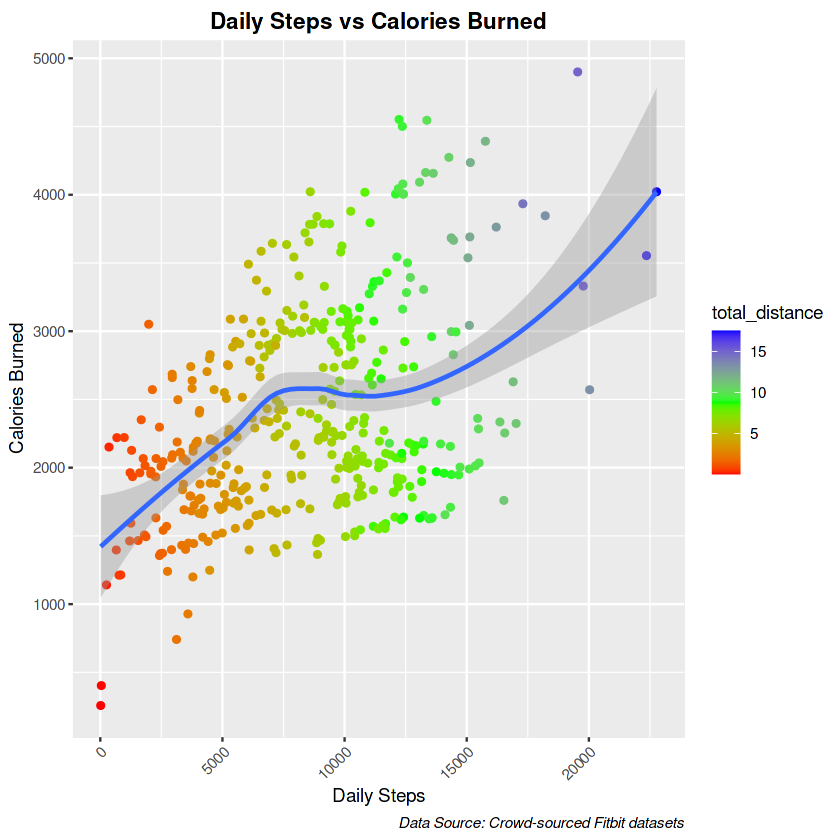

In [7]:
#daily step vs calorie visualization
prelim_daily_steps <- ggplot(data=merged_daily_df, aes(x=total_steps, y=calories))+
  geom_point(aes(colour = total_distance))+
  geom_smooth()+
  xlab("Total Steps") + ylab("Calories Burned")+
  scale_color_gradientn(colours = rainbow(3))+
  theme(plot.title = element_text(face = "bold", vjust = 0.5, hjust = 0.5),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
        plot.caption = element_text(face = "italic"))+
  labs(x = "Daily Steps", y = "Calories Burned", title = "Daily Steps vs Calories Burned",
       caption = "Data Source: Crowd-sourced Fitbit datasets")
print(prelim_daily_steps)

The data set shows that correlation between how many steps are taken with calories burned. This makes sense as the more we move in general throughout the day, the more calories we will burn as a result. This could be from direct exercise or N.E.A.T (Non-Exercise Activity Thermogenesis). 

In [8]:
#cleaning hourly data for visualization
hourly_new <- merged_hourly_df %>% 
  group_by(hour) %>% 
  drop_na() %>% 
  summarise(mean_steps_hour = mean(step_total))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



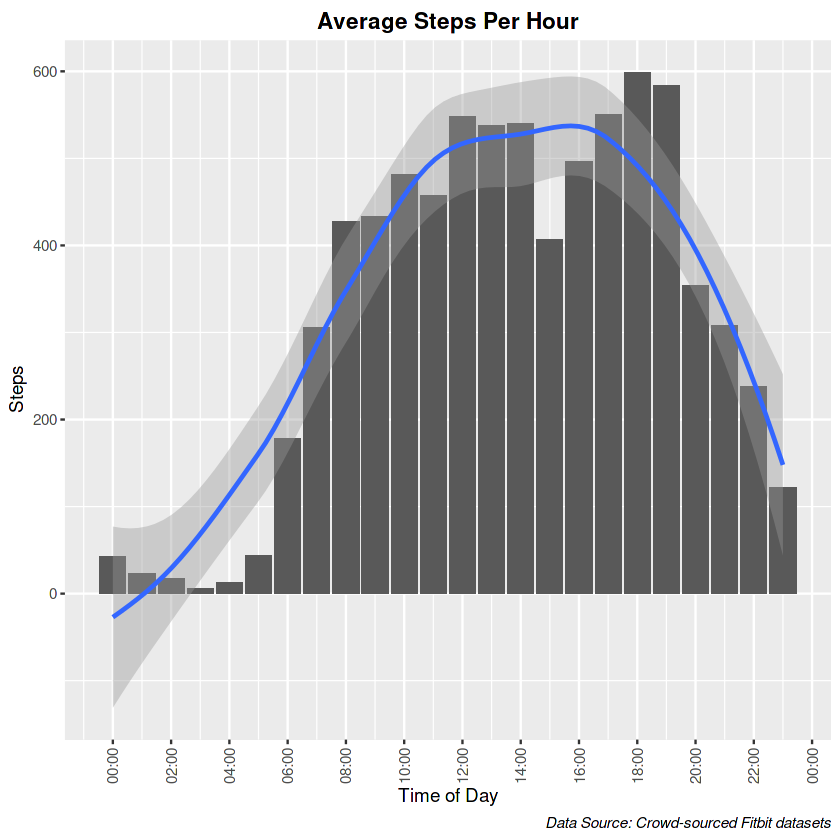

In [9]:
#hourly visualization

prelim_hourly <- hourly_new  %>% 
  mutate(hour = as.POSIXct(hms::parse_hm(hour))) %>% 
  ggplot(aes(hour, mean_steps_hour))+
  geom_col()+
  geom_smooth()+
  scale_x_datetime(breaks = scales::date_breaks("120 mins"), date_labels = "%H:%M")+
  theme(plot.title = element_text(face = "bold", vjust = 0.5, hjust = 0.5),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
        plot.caption = element_text(face = "italic"))+
  labs(x = "Time of Day", y = "Steps", title = "Average Steps Per Hour",
       caption = "Data Source: Crowd-sourced Fitbit datasets")
print(prelim_hourly)


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



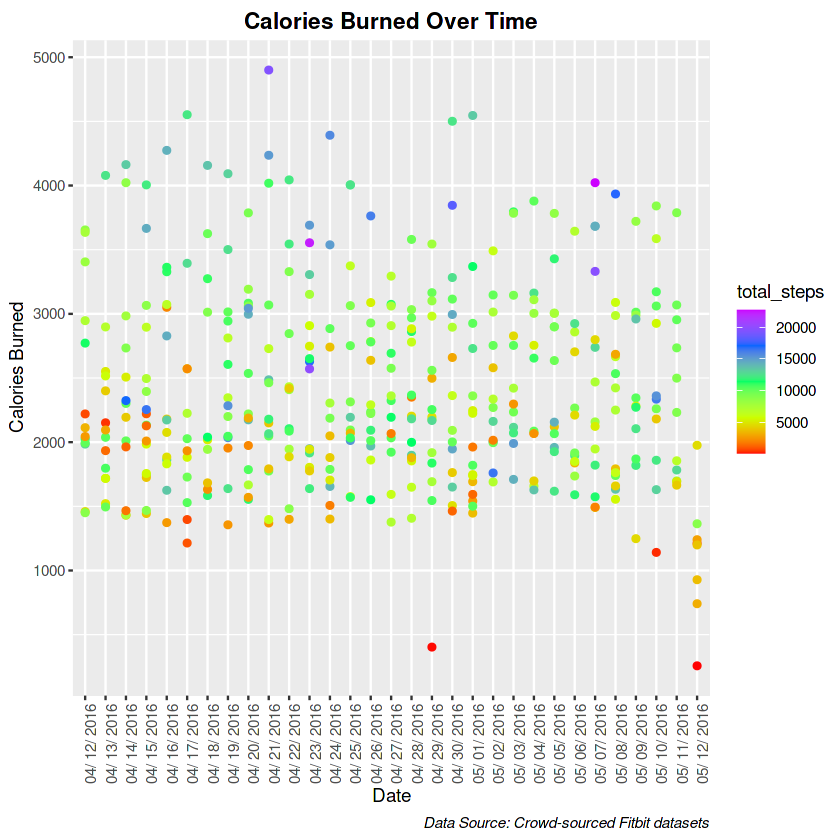

In [10]:
#daily calorie vs time visualization
prelim_daily_calories <- ggplot(data=merged_daily_df, aes(x = activity_date, y = calories)) +
  geom_point(aes(colour = total_steps))+
  geom_smooth()+
  scale_color_gradientn(colours = rainbow(5))+
  theme(plot.title = element_text(face = "bold", vjust = 0.5, hjust = 0.5),
        axis.text.x = element_text(angle = 90, vjust = 1, hjust = 1),
        plot.caption = element_text(face = "italic"))+
  labs(x = "Date", y = "Calories Burned", title = "Calories Burned Over Time",
       caption = "Data Source: Crowd-sourced Fitbit datasets")
print(prelim_daily_calories)


<font size = "2"><b>Observations</b></font>
<br>
Reviewing the data, there is a fairly strong correlation to the number of steps taken daily with the number of calories an individual will burn. 

The data also shows that between 9 pm and 7 am, activity seems to be at its lowest. This does make sense as these are the typically hours more users are asleep. However, there was a notable dip in hourly activity between the times of 3 pm and 5 pm as well. This may be due to commuting activities or wrapping up the workday. This could be a potential opportunity to alert users of inactivity times or reminders to get up and more around these afternoon times.

During the time that this data was collected however, it does look like users had a declining number of calories burned throughout the survey. This drop could be due to a lack of reminders to move or fatigue from trying to keep up with their intrinsic goals set on a daily basis to get up and move more. 


<font size = "3"><b>Act</b></font>
<br>
<br>
<font size = "2"><b>Recommendations</b></font>
<br>
<br>
<font size = "2"><b>1. Use the down times of morning, mid-day, and evening to help increase notices to move for customers.</b></font> 
<br>
<br>
After looking through all of the information, before 8 am, between 3 pm-5pm, and after 9 pm seem to be the times where the average steps are the lowest where a person may be awake. The User would simply need to have an input for their sleep and wake settings which will allow for the app to prevent any accidental sleep disturbances. Once this has been set by the user, intermittent reminders throughout the day can be sent to the wearer as reminders. Also, during the mid-day down time, reminders should be added to do things to increase a person’s N.E.A.T such as park at the back of the parking lot to walk further into work or be sure to take a short walk before and/or after work. It only takes 3,500 calories to burn a pound1 in a week and every step matters.
<br>
<br>
<font size = "2"><b>2. Offer friendly individual and group community challenges to assist user’s macro wellness goals</b>
<br>
<br>
The data showed a decline in the calories burned toward the end of the study for all users. To avoid burning out the users, friendly competitions within communities can be established to ensure that users remain engaged and do not fade after a few months of use. The importance of reaching any fitness goal is consistency and helping to engage the users when the weight scales may be stagnant, or the workouts/cardio routines begin to feel monotonous and repetitive. This competition could be a powerful tool for continued overall health and wellness for an individual. It is easier to focus on consistent short-term goals that align with a macro strategy then to take on the macro strategy all at once and get burned out of overwhelmed. The sort of games can even have added incentives for the top users in the community, such as special discounts on future products or special awards that can be pinned to their profiles. 
<br>
<br>
<font size = "2"><b>3. Nutrition Tracking and Suggestions</b>
<br>
<br>
If Bellabeats partners with an existing company such as MyFitnessPal, MyPlate, Yummly Recipes, etc. the company could leverage this partnership to bring potentially some familiarity to the users to simply sign in and integrate their accounts for easy tracking across products. This would also allow for a robust catalog of recipes and food labels to be utilized that have been created and maintained by the partner nutrition apps. Bellabeats can also implement their own tracking information but would have to leverage more internal teams for a project of that magnitude. In either option, Bellbeats can use their unique in-app menstrual cycle tracking to analyze dietary information around this monthly cycle and provide insights on nutrition trends and habits to help the users make better food choices year-round.  The partner option does not allow for much flexibility for tracking outside of the app where the in-house options allow for the most flexibility. However, both options would first need to have a full cost-benefit analysis run to ensure it fits any budget requirements the business may have for research and development. 
<br>
<br>
    <b>In conclusion</b>, Bellabeats has a unique approach to the smart device business through its female focused demographic approach to fitness and wellness and this can be leveraged to continue to increase the market share of the smart fitness device industry. By taking down times throughout the day and the trends, users can be notified and kept up to date on their health to ultimately empower women to be in control of their health and become their best self.  
<br>
    <b>Thank you!!</b> If you have made it this far reading my Bellabeat Case Study to complete my Google Data Analytics Certification. 
<br>
<br>
This is my first ever case study of project completed. I would greatly appreciate any and all feedback or possible improvements that can be made to increase the efficiency of the code being used. 

References: 

Women holding smoothie. Bellabeat, www.bellabeat.com/wp-content/uploads/2021/12/ivy-7-1440x1440.jpg

Blush Ivy Smart Bracelet. Bellabeat, www.bellabeat.com/wp-content/uploads/2021/10/2brg-1.jpg

Wutke, Shelly. “Should I buy a smartwatch or a fitness tracker?” 31 Oct. 2021, Best Buy Blog, https://blog.bestbuy.ca/wp-content/uploads/2020/05/Fitbit_Full_Family-e1619635272547.jpg

[Wishnofsky M.].(1958). “Caloric Equivalents of Gained or Lost Weight.” Am J Clin Nutr (6: 542-546)
